In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Datasets/heart.csv')

In [4]:
df.head(10)

# Here target is a dependent feature as in it 1 means Yes(You have a Heart Disease) and 0 means No(You do not have a Heart Disease).

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

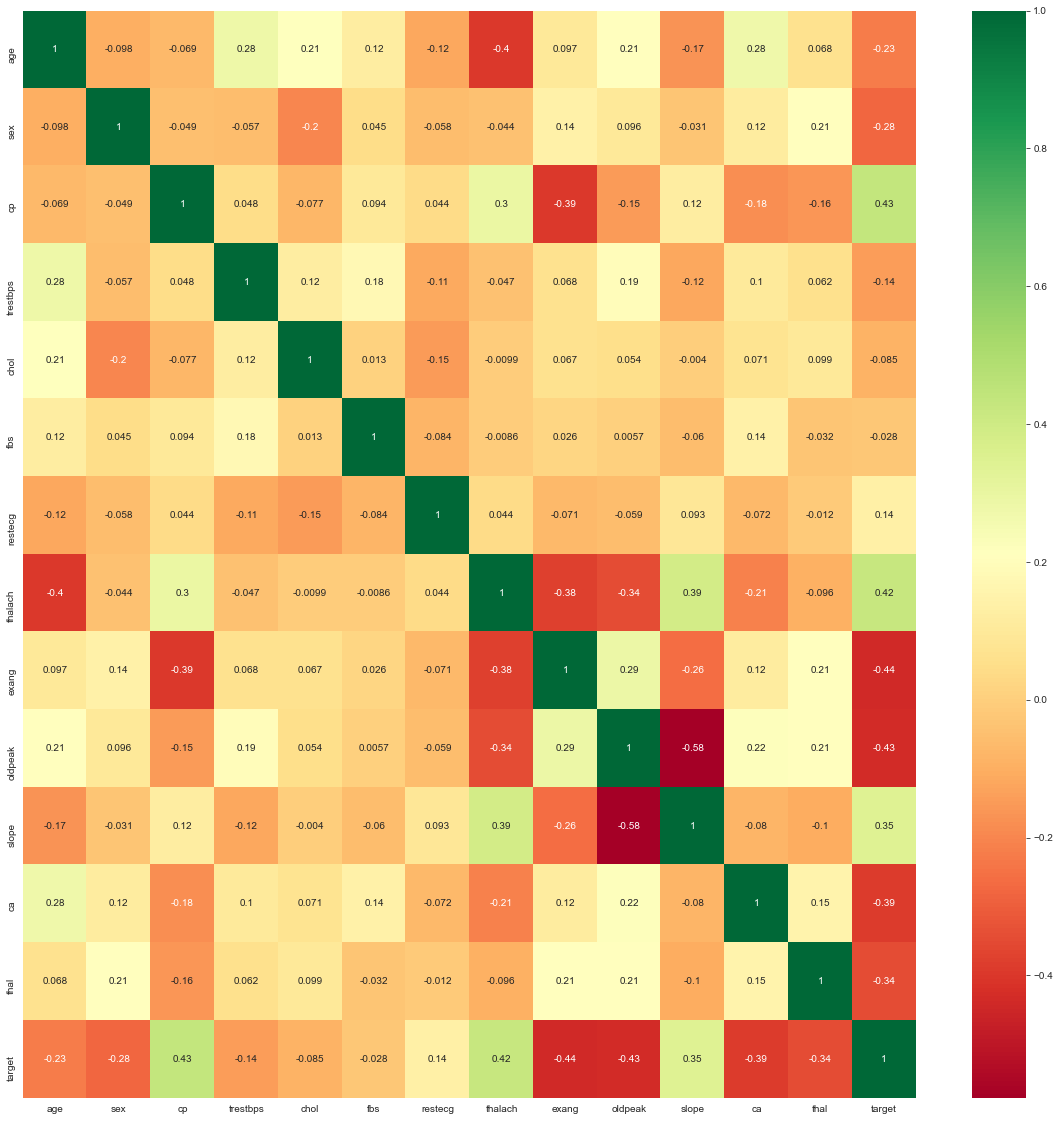

In [54]:
import seaborn as sns
correlation = df.corr()
top_corr_features = correlation.index
plt.figure(figsize=(20,20))
graph = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

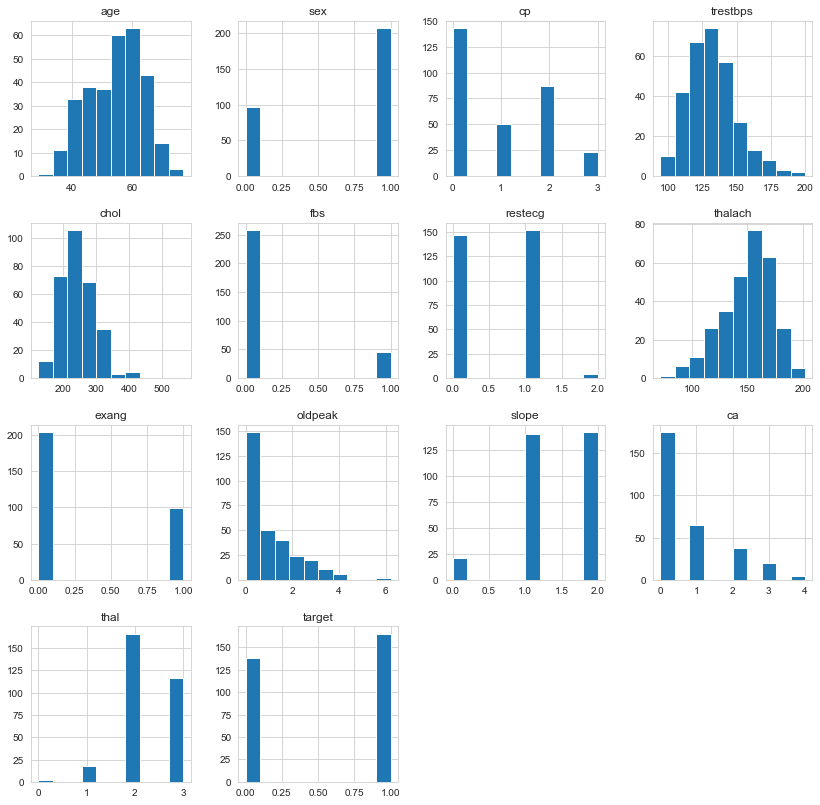

In [55]:
df.hist(figsize = (14, 14))
plt.show()

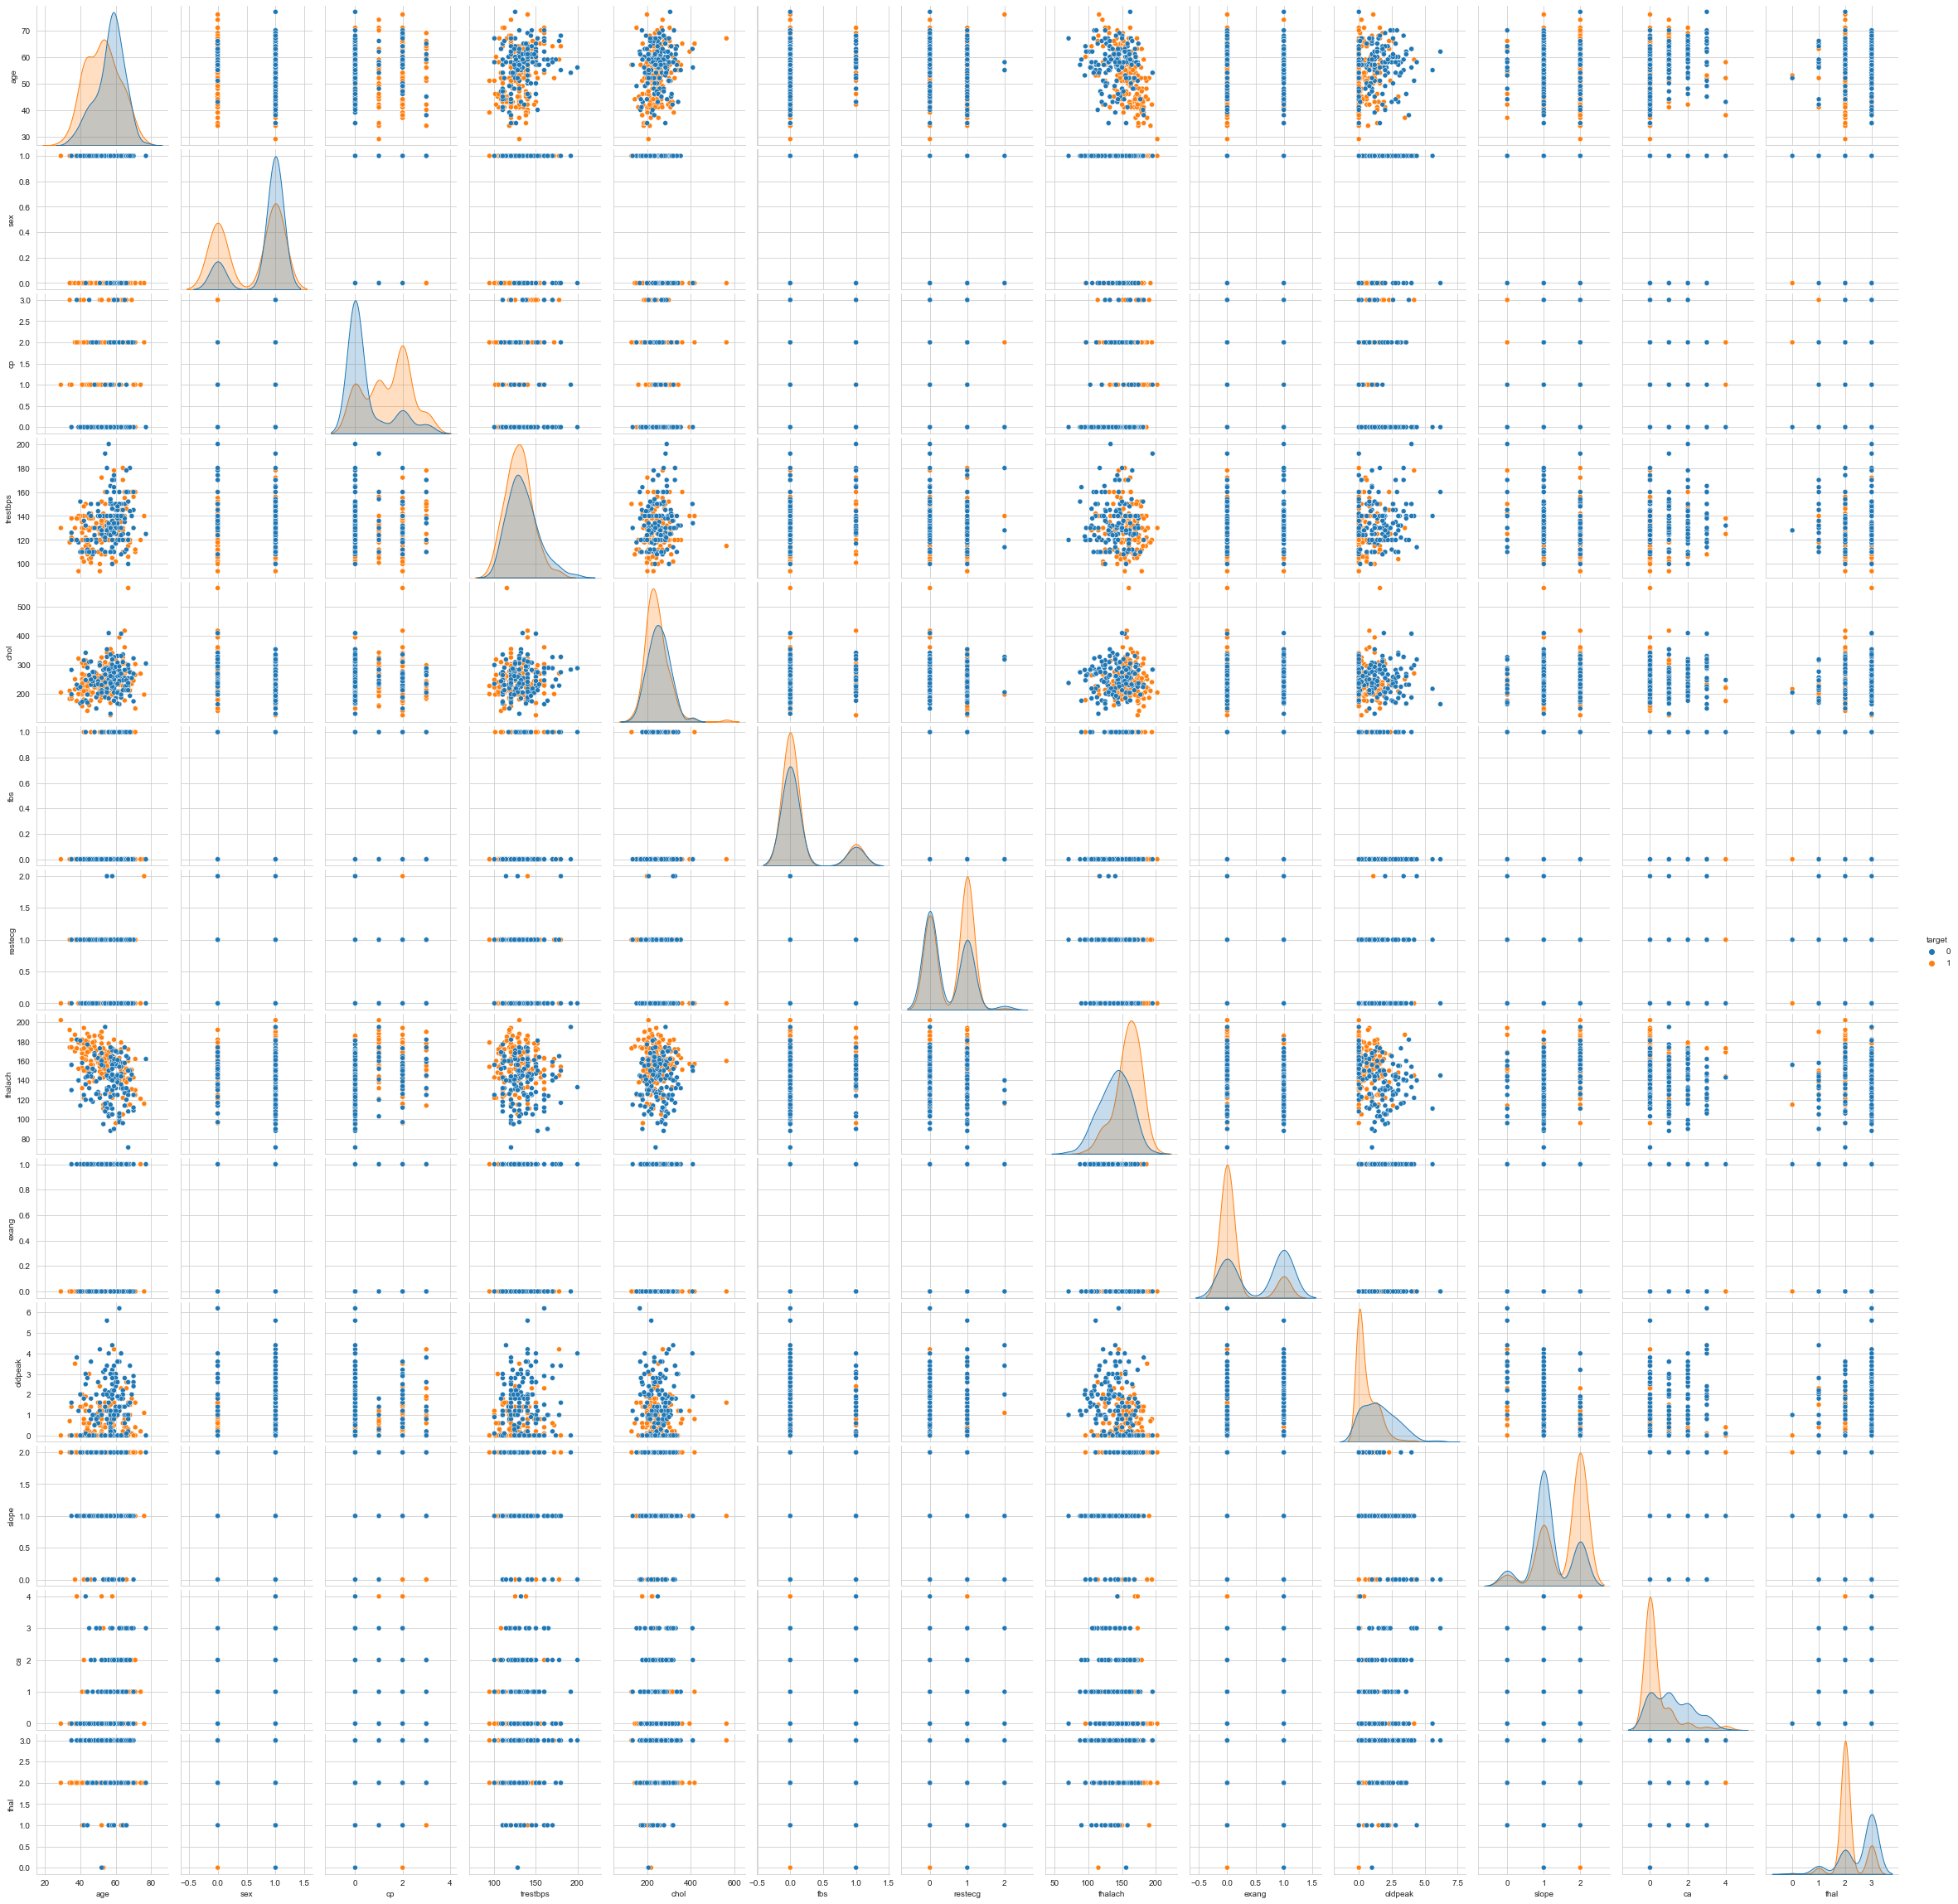

In [56]:
sns.pairplot(df, hue = 'target')

<AxesSubplot:xlabel='target', ylabel='count'>

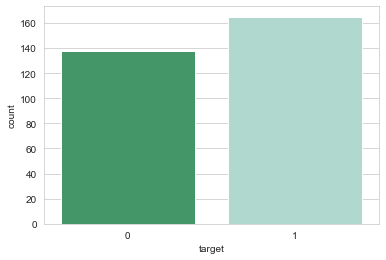

In [57]:
# To check for Balance Dataset

sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='BuGn_r')

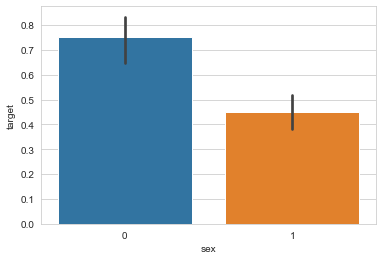

In [58]:
# To check which sex has most number of Heart Disease Cases

sns.barplot(df['sex'], df['target'])
plt.show()

## Data Preprocessing

In [59]:
X = df.loc[:,:'thal']
y = df['target']

In [60]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.3)

In [71]:
X_train.shape

(212, 13)

In [72]:
X_test.shape

(91, 13)

### Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
pred_dt = dt.predict(X_test)

In [75]:
pred_dt

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [76]:
accuracy_dt = accuracy_score(y_test, pred_dt) * 100

In [77]:
accuracy_dt

86.81318681318682

In [84]:
def plot_feature_importance(model):
    plt.figure(figsize = (8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")

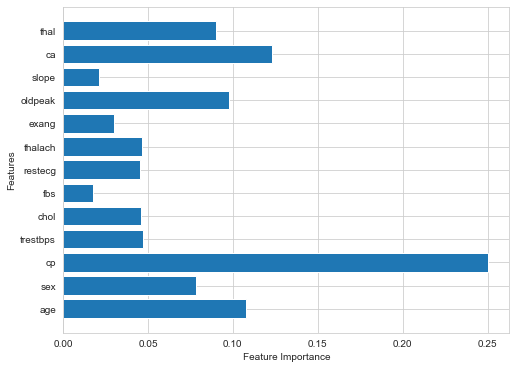

In [85]:
plot_feature_importance(dt)

## KNearest Neighbor(KNN) Classifier

In [122]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X)

X_std = std.transform(X)

In [124]:
X_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [125]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, random_state = 2, test_size = 0.3)

In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=7)

In [127]:
pred_knn = knn.predict(X_test_std)

In [128]:
accuracy_knn = accuracy_score(y_test, pred_knn) * 100

In [129]:
accuracy_knn

87.91208791208791

## Random Forest Classifier

In [207]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 40)

rf.fit(X_train_std, y_train)

RandomForestClassifier(n_estimators=40)

In [208]:
pred_rf = rf.predict(X_test_std)

In [209]:
accuracy_rf = accuracy_score(y_test, pred_rf) * 100

In [210]:
accuracy_rf

89.01098901098901

In [211]:
algorithms = ['Decision Tree', 'KNN', 'Random Forest']
scores = [accuracy_dt, accuracy_knn, accuracy_rf]

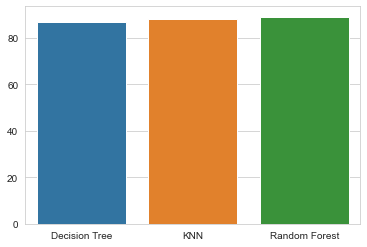

In [212]:
sns.barplot(algorithms, scores)
plt.show()